## 0. EDA (*)

In the whole exercise, we will work with the "mpg" dataset from seaborn dataset. Start by loading dataset "mpg" from the ```load_dataset``` method in seaborn module. The goal will be to use linear regression to predict mpg - miles per gallon. 

&nbsp; a) Start by doing some initial EDA such as info(), describe() and figure out what you want to do with the missing values.

&nbsp; b) Use describe only on those columns that are relevant to get statistical information from. 

&nbsp; c) Make some plots on some of the columns that you find interesting.

&nbsp; d) Check if there are any columns you might want to drop.

---

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = sns.load_dataset("mpg")

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


**a)**

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [89]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


**b)**

In [90]:
df[["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration"]].describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000


**c)**

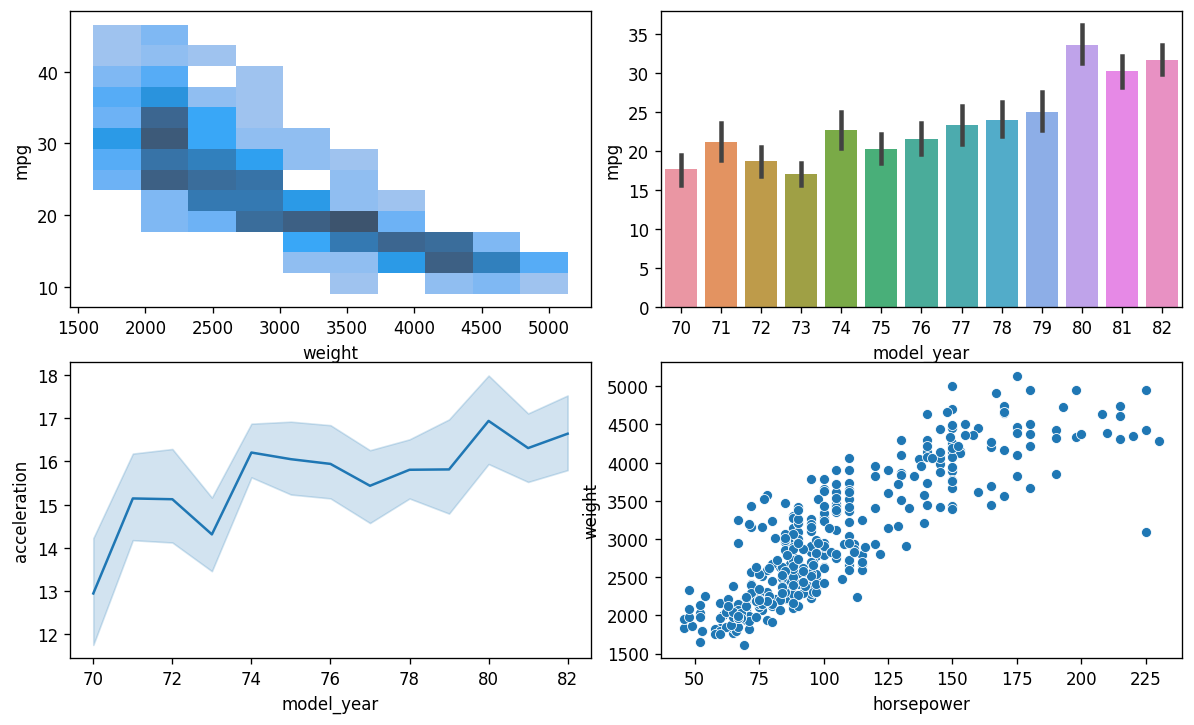

In [91]:
fig, ax = plt.subplots(2, 2, figsize= (10, 6) ,dpi= 120)
fig.tight_layout()

sns.histplot(data=df, x="weight", y="mpg", ax= ax[0][0])
sns.barplot(data=df, x="model_year", y="mpg", ax= ax[0][1])
sns.lineplot(data=df, x="model_year", y="acceleration", ax= ax[1][0])
sns.scatterplot(data=df, x="horsepower", y="weight", ax= ax[1][1])

plt.show()

**d)**

In [92]:
df = df.dropna()
df = df.drop(columns=["origin", "name"])

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 24.5 KB


## 1. Train|test split (*)

We want to predict the "mpg", split up X and y, and perform train|test split using scikit-learn. Choose test_size of 0.2 and random_state 42. Control the shapes of each X_train, X_test, y_train, y_test.  

---

In [94]:
from sklearn.model_selection import train_test_split

X, y = df.drop("mpg", axis= "columns"), df["mpg"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((313, 6), (79, 6), (313,), (79,))

## 2. Function for evaluation (*)

Create a function for training a regression model, predicting and computing the metrics MAE, MSE, RMSE. It should take in parameters of X_train, X_test, y_train, y_test, model. Now create a linear regression model using scikit-learns ```LinearRegression()``` (OLS normal equation with SVD) and call your function to get metrics. 

---

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

def train_model(X_train, X_test, y_train, y_test, model):

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    MAE = mean_absolute_error(y_test, y_pred)

    return (MSE, RMSE, MAE)

model_OLS = LinearRegression()

print(train_model(X_train, X_test, y_train, y_test, model_OLS))



(10.502370329417312, 3.240736078334259, 2.5038600897761256)


## 3. Compare models (*)

Create the following models 
- Linear regression (SVD)
- Linear regression (SVD) with scaled data (feature standardization)
- Stochastic gradient descent with scaled data (feature standardization)
- Polynomial linear regression with degree 1
- Polynomial linear regression with degree 2
- Polynomial linear regression with degree 3

Make a DataFrame with evaluation metrics and model. Which model performed overall best?

---

In [96]:
def scaled_data(X_train, X_test):

    scaler = MinMaxScaler()
    scaler.fit(X_train)

    scaled_X_train = scaler.transform(X_train)
    scaled_X_test = scaler.transform(X_test)

    return (scaled_X_train, scaled_X_test)

df_metrics = pd.DataFrame()

df_metrics["linreg"] = train_model(X_train, X_test, y_train, y_test, model_OLS)

scaled_X_train, scaled_X_test = scaled_data(X_train, X_test)

df_metrics["linreg (scaled)"] = train_model(scaled_X_train, scaled_X_test, y_train, y_test, model_OLS)


In [97]:
from sklearn.linear_model import SGDRegressor

model_SGD = SGDRegressor(random_state=42)

df_metrics["Sgd"] = train_model(scaled_X_train, scaled_X_test, y_train, y_test, model_SGD)


In [103]:
from sklearn.preprocessing import PolynomialFeatures

for i in range(1, 4):

    model_polynomial = PolynomialFeatures(degree=i, include_bias=False)

    train_X_poly = model_polynomial.fit_transform(X_train)
    test_X_poly = model_polynomial.transform(X_test)

    df_metrics[f"Poly, deg: {i}"] = train_model(train_X_poly, test_X_poly, y_train, y_test, model_OLS)

In [104]:
df_metrics

,linreg,linreg (scaled),Sgd,"Poly, deg: 1","Poly, deg: 2","Poly, deg: 3"
0,10.502370,10.502370,11.185415,10.502370,7.419858,9.273478
1,3.240736,3.240736,3.344460,3.240736,2.723942,3.045239
2,2.503860,2.503860,2.567729,2.503860,1.980477,2.117867
